### Teorema: è sempre possibile costruire un triangolo rettangolo dove i cateti sono la media geometrica e la deviazione standard di 2 valori mentre l'ipotenusa è la loro media. Se i 2 valori sono probabilità opposte, l'ipotenusa di questo triangolo sarà 0.5, e la sua area al variare di p varierà secondo una curva pari al valore assoluto della derivata di una campana di gauss rigirata e traslata

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, sqrt, Interval, integrate
import matplotlib_inline
from IPython.display import display

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

### lemma 1: il prodotto di 2 numeri può essere considerato come la differenza tra la loro media al quadrato e la loro deviazione standard al quadrato

#### Dimostrazione

in questo notebook lavorerò prima con i simboli x e y

Lavorerò solo sul dominio dei reali

In [2]:

x, y,  = symbols('x y', real=True)
data = [x, y]

calcolo la media

In [3]:
m = sum(data)/len(data)
display(simplify(m))

x/2 + y/2

**la deviazione standard può essere vista come la radice quadrata della varianza**

calcolo la varianza

In [4]:
variance = sum([(x - m)**2 for x in data]) / len(data)
display(simplify(variance))

(x - y)**2/4

calcolo la deviazione standard

In [5]:

ds = simplify(sqrt(variance))

display(ds)

Abs(x/2 - y/2)

verifico che il prodotto tra i 2 numeri equivalga alla differenza tra la loro media al quadrato e la loro deviazione standard al quadrato

In [6]:
expr = m**2 - ds**2
display(simplify(expr) == x*y)

True

#### Il lemma è verificato, ma se ce ne fosse bisogno possiamo raccogliere ulteriori prove empiriche

calcolo la differenza tra la media e la deviazione standard variante ddof a 0 (come visto nel lemma precedente rappresenta il prodotto) in numpy

In [7]:
def np_mean_std(pt):
  return np.mean(pt)**2 - np.std(pt, ddof=0)**2

In [8]:
np.random.seed(0)
test_values =  np.random.randint(0, 101, size=(10, 2))

for av, bv in test_values:
    expr_val = float(expr.subs({x: av, y: bv}))
    prod_val = float(av * bv)
    np_val = np_mean_std([av,bv])
    
    print(f"x={av}, y={bv} -> expr={expr_val}, ab={prod_val}, np={np_val} (espressione,prodotto): {expr_val == prod_val}, (espressione,numpy): {expr_val == np_val}")


x=44, y=47 -> expr=2068.0, ab=2068.0, np=2068.0 (espressione,prodotto): True, (espressione,numpy): True
x=64, y=67 -> expr=4288.0, ab=4288.0, np=4288.0 (espressione,prodotto): True, (espressione,numpy): True
x=67, y=9 -> expr=603.0, ab=603.0, np=603.0 (espressione,prodotto): True, (espressione,numpy): True
x=83, y=21 -> expr=1743.0, ab=1743.0, np=1743.0 (espressione,prodotto): True, (espressione,numpy): True
x=36, y=87 -> expr=3132.0, ab=3132.0, np=3132.0 (espressione,prodotto): True, (espressione,numpy): True
x=70, y=88 -> expr=6160.0, ab=6160.0, np=6160.0 (espressione,prodotto): True, (espressione,numpy): True
x=88, y=12 -> expr=1056.0, ab=1056.0, np=1056.0 (espressione,prodotto): True, (espressione,numpy): True
x=58, y=65 -> expr=3770.0, ab=3770.0, np=3770.0 (espressione,prodotto): True, (espressione,numpy): True
x=39, y=87 -> expr=3393.0, ab=3393.0, np=3393.0 (espressione,prodotto): True, (espressione,numpy): True
x=46, y=88 -> expr=4048.0, ab=4048.0, np=4048.0 (espressione,prodott

Ogni caso risulta uguale nell'espressione, nel prodotto e nella versione del lemma rielaborata in numpy.

<h4><u>Abbiamo dimostrato il primo lemma.</u></h4>


ora sappiamo che la moltiplicazione può essere vista come la media al quadrato - la deviazione standard al quadrato

per via del lemma 1 sappiamo che 

$$
x \cdot y = \left(\frac{x+y}{2}\right)^2 - \left(\frac{|x-y|}{2}\right)^2
$$

quindi basata applicare un po di semplice algebra

$$
- \left(\frac{x+y}{2}\right)^2 =  - \left(\frac{|x-y|}{2}\right)^2 - x \cdot y
$$

$$
\left(\frac{x+y}{2}\right)^2 =  \left(\frac{|x-y|}{2}\right)^2 + x \cdot y
$$

e dato che la radice quadrata di x^2 è x

$$
\left(\frac{x+y}{2}\right)^2 =  \left(\frac{|x-y|}{2}\right)^2 + \sqrt{x \cdot y}^2
$$

Di conseguenza, la media tra i 2 numeri risulta la distanza euclidea tra la loro deviazione standard e la loro media geometrica

### <u>Abbiamo dimostrato il teorema sopra enunciato.</u>


Quindi **è sempre possibile creare un triangolo rettangolo dove i cateti saranno la media geometrica dei 2 valori e la loro deviazione standard, mentre l'ipotenusa sarà la media.**

Inoltre, dato che la media tra 2 probabilità opposte p e 1-p è sempre 0.5, sappiamo che **sostituendo ad x e y 2 probabilità reciproche avremo sempre un triangolo rettangolo di ipotenusa 0.5.**

Ma questo triangolo rettangolo ha un senso statisticamente parlando ?

#### Indagine sul senso statistico dell'area del suddetto triangolo

Calcoliamo l'area di questo triangolo in funzione di x e y

In [9]:
c1 = sqrt(x*y)
c2 = ds

area = c1*c2/2

print("l'area del triangolo si può calcolare come:")

display(area)

l'area del triangolo si può calcolare come:


sqrt(x*y)*Abs(x/2 - y/2)/2

p rappresenta la probabilità, sarà un numero reale compreso tra 0 e 1

In [10]:
p = symbols('p', real=True, domain=Interval(0, 1))

effettuiamo la seguente sostituzione {x: p, y: 1-p}

In [11]:
areaP = area.subs({x: p, y: (1-p)})
display(areaP)

sqrt(p*(1 - p))*Abs(p - 1/2)/2

sqrt(p*(1 - p))*Abs(p - 1/2)/2

Ora calcoliamo creiamo uno spazio lineare di 200 valori tra 0 e 1 che rappresentano che rappresentano un insieme di probabilità p distanti tra loro dello 0.5%, e valutiamo l'area del triangolo considerando un insieme probabilistico e il suo opposto, vediamo i punti ricavati in deviazione standard (dss), media (ms), media geometrica (mgs) e area del triangolo (areas)

In [12]:
def calculate_values(ls, f, label):
  res = []
  for _, n in enumerate(ls):
    res.append(f.subs({x: n, y: 1-n}))
    
  # print(f'{label}:  {[f"{p:.5f}" for p in res]}')
  return res

In [13]:
dss = []
ms = []
mgs = []
areas = []

ls = np.linspace(0,1, num=1001)

dss = calculate_values(ls, ds, 'dss')
ms = calculate_values(ls, m, 'ms')
mgs = calculate_values(ls, c1, 'mgs')
areas = calculate_values(ls, area, 'areas')


Ora, sulla base di questi valori andiamo a calcolare i grafici e vediamo come variano i valori all'interno di esse

In [14]:
def generate_chart(fn_name, values, indexes):
  plt.figure(figsize=(14,7))
  plt.plot(indexes, values, marker='o', ms=3, linestyle='-', color='blue', solid_capstyle='round', solid_joinstyle='round')
  plt.title(f"Grafico cartesiano di {fn_name}")
  plt.xlabel("Indice o asse x")
  plt.ylabel(f"Valore ({fn_name})")
  plt.grid(True)
  plt.axhline(0, color='black', linewidth=0.8)
  plt.axvline(0, color='black', linewidth=0.8)
  plt.axvline(x=np.mean(indexes), color='red', linestyle='--', linewidth=2, label='Threshold al 50%')
  plt.legend()
  
  plt.show()

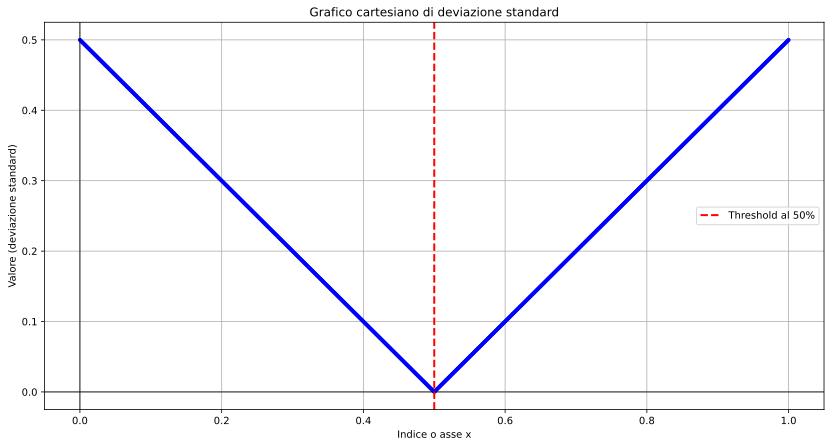

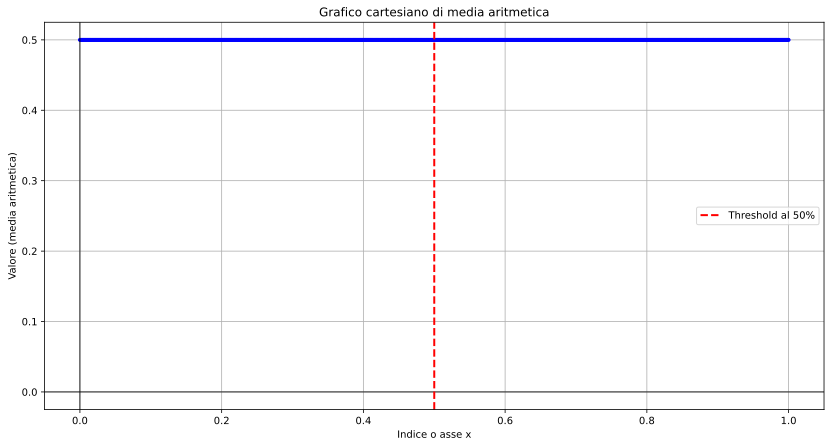

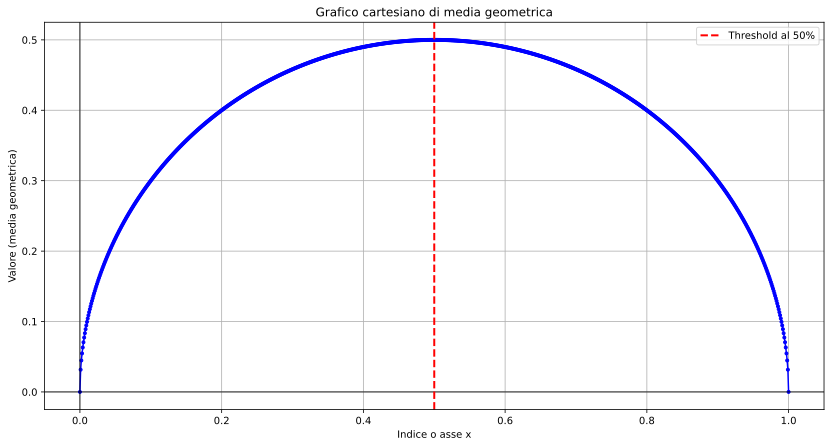

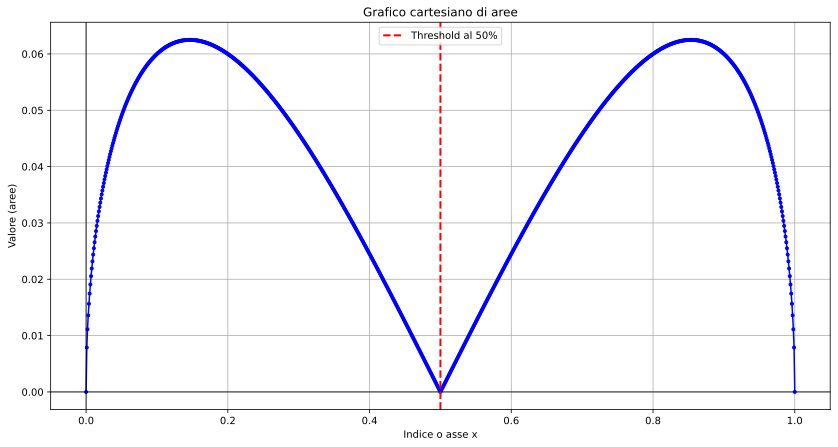

In [15]:
generate_chart('deviazione standard', dss, ls)
generate_chart('media aritmetica', ms, ls)
generate_chart('media geometrica', mgs, ls)
generate_chart('aree', areas, ls)

è possibile notare come nella media ci sia uno stazionamento (prevedibile), la deviazione standard mostri invece una funzione lineare con tanto di valore assoluto (y = |x - 0.5|), mentre per la media geometrica e l'area abbiamo delle funzioni non lineari:
* media geometrica -> curva a campana piatta
* area -> curva a gobba di cammello

In [16]:
resorted = []
for idx, value in enumerate(areas):
  resorted.append((idx, value))
  
resorted.sort(key=lambda item: item[1])

print('minimum', resorted[:3])
print('maximum', resorted[::-1][:2])

minimum [(0, 0), (500, 0), (1000, 0)]
maximum [(854, 0.0624998002876809), (146, 0.0624998002876809)]


la funzione ha 2 gobbe di cammello e presenta minimi nei punti 0, 50 e 100, mentre massimi a 15 e 85, quindi al 15° e all' 85° percentile

la mia ipotesi è che la funzione possa essere il valore assoluto della derivata della campana di gauss

In [17]:
areaP_integrate = integrate(areaP, p)

display(simplify(areaP_integrate))

Piecewise(((p*(1 - p))**(3/2)/6, p <= 1/2), (p**2*sqrt(p*(1 - p))/6 - p*sqrt(p*(1 - p))/6 + 1/24, True))

In [18]:
integrated_areas = []
for _, n in enumerate(ls):
  integrated_areas.append(areaP_integrate.subs({p: n}))

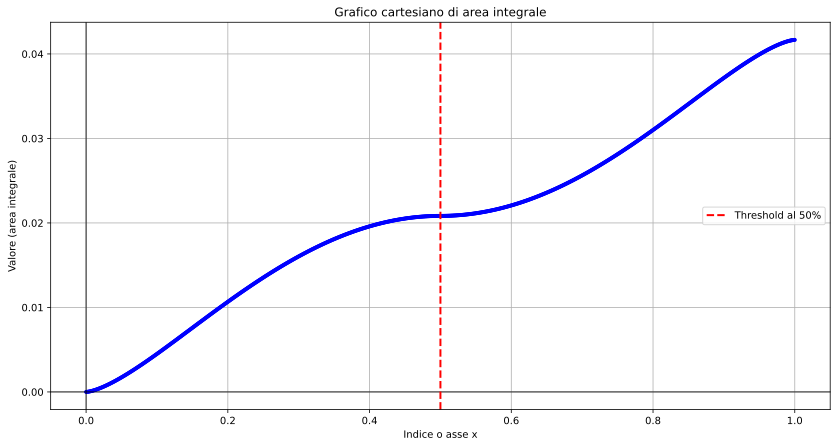

In [19]:
generate_chart('area integrale', integrated_areas, ls)

il suo integrale somiglia a una sigmoide

In [20]:
n_c1 = sqrt(p*(1-p))
n_c2 = (p-(1-p))/2

non_abs_area = integrate(n_c1*n_c2/2)

In [21]:
non_abs_integrated_areas = []
for _, n in enumerate(ls):
  non_abs_integrated_areas.append(non_abs_area.subs({p: n}))

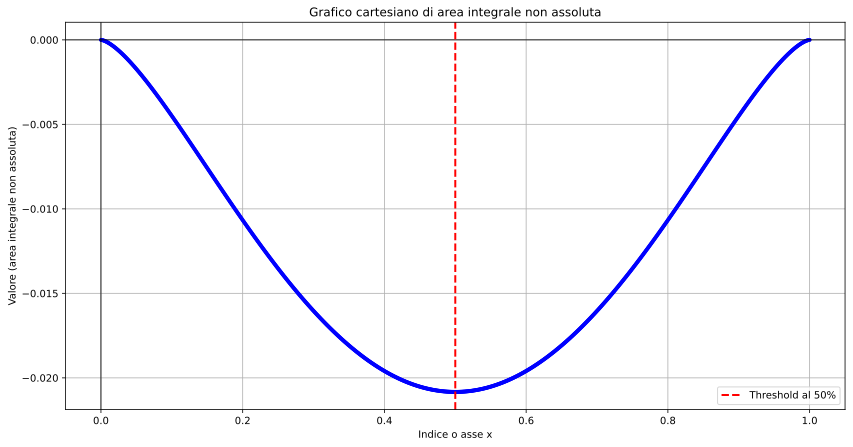

In [22]:
generate_chart('area integrale non assoluta', non_abs_integrated_areas, ls)

l'area del suddetto triangolo quindi con 2 probabilità reciproche rappresenta la derivata di una campana di gauss negativa e traslata